In [263]:
#import python packages
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import matplotlib as cm
import scipy.stats as st

import sys
sys.path.append("C:/Users/DEBI/Downloads/Y")
from mchlearn.plotting import confidence_ellipse
from mchlearn.plotting import grid



In [264]:
import sys
sys.path.append("mchleaern")

In [265]:
from mchlearn.plotting import confidence_ellipse
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [266]:
def read_file(filename,sep,names,classColumn):
    """
    this function takes the file path in the os 
    and read the file in pandas dataframe,also find the number of features to process and number of classes

    """

    data=pd.read_csv(filename,sep=sep,names=names)
    numberOfClasses=len(data[classColumn].value_counts().index)
    groups=data.groupby(classColumn)
    Features=len([col for col in data.columns if col != classColumn])
    
    return numberOfClasses,groups,Features,data
    

In [267]:
# This function accepts a numpy matrix which contain the data and return the mean and sigma of the distribution.

def gaussian_estimation(data,numberOfFeatures):
  

    mu = np.mean(data,0)
    sigma = np.cov(data,rowvar=False)
  #we are assuming feature indepandancy 
  
    sigma=sigma*np.eye(numberOfFeatures)
    
    return mu, sigma

In [268]:
def distribution_calculation(groups,colors,classColumn,numFeatures):

    #This method calculate the probability density function of each class,
    #all the statistical analysis needed for each class distribution
    # draw a 2d scatter plot for the distributions of the classes.
    
  
    #mean of each class
    mus={}
    #  variances of the features
    sigmas={}
        
  # the PDF of each class

    classes_pdf={}
    fig, ax = plt.subplots()
    colors=colors
    colors_iterator=0

    for groupname,group in groups:
        # assign a color for this class 
        color=colors[colors_iterator]
        # find class column 
        cols=[col for col in group.columns if col != classColumn]
        # compute the mean and sigma for each class
        mu,sigma=gaussian_estimation(group[cols].values,numFeatures)
        # store the value of the mean vector
        mus[groupname]=mu
        # store the value of the covariance matrix 
        sigmas[groupname]=sigma
        
        # use the calculated mu and sigma to have the PDF  using scipy multivariate_normal
        dist=st.multivariate_normal(mu, sigma)
     
        classes_pdf[groupname]=dist
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        # draw the scatter plot for the class in order to visualize the the data
        ax.scatter(group.x1, group.x2, alpha=0.2,color=color, label='class '+str(groupname));
        # draw the border of each class
        confidence_ellipse(mu, sigma, ax,edgecolor=color)
        ax.legend()
        ax.set_title('the distribution of the classes')
        colors_iterator+=1
    
    return mus,sigmas,classes_pdf

In [269]:
def distribution_calculationV2(data,groups,colors,classColumn,numFeatures):
    
    #This method calculate the probability density function of each class,
    #all the statistical analysis needed for each class distribution
    # draw a 2d scatter plot for the distributions of the classes.
    
  
    #mean of each class
    mus={}
    #  variances of the features
    sigmas={}
        
  # the PDF of each class

    classes_pdf={}
    fig, ax = plt.subplots()
    colors=colors
    colors_iterator=0

    for groupname,group in groups:
        # assign a color for this class 
        color=colors[colors_iterator]
        # find class column 
        cols=[col for col in group.columns if col != classColumn]
        # compute the mean and sigma for each class
        mu,sigma=gaussian_estimation(group[cols].values,numFeatures)
        # store the value of the mean vector
        mus[groupname]=mu
        # store the value of the covariance matrix 
        sigmas[groupname]=sigma
        
        # use the calculated mu and sigma to have the PDF  using scipy multivariate_normal
        dist=st.multivariate_normal(mu, sigma)
     
        classes_pdf[groupname]=dist
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        # draw the scatter plot for the class in order to visualize the the data
        ax.scatter(group.x1, group.x2, alpha=0.2,color=color, label='class '+str(groupname));
        # draw the border of each class
        confidence_ellipse(mu, sigma, ax,edgecolor=color)
        ax.legend()
        ax.set_title('the distribution of the classes')
        colors_iterator+=1
    
    return mus,sigmas,classes_pdf
   
   

In [270]:
#maximum liklihood for binclass data
def prob_pos_cond_x1x2(data):
    
   # This function takes the whole data as input and calculate the maximum likelihood of each class 
    

    p_pos=(classes_pdf[1].pdf(data))
    p_neg=(classes_pdf[-1].pdf(data))
    return p_pos/(p_pos+p_neg)



In [271]:
#maximum liklihood for binclassv2  data
def prob_pos_cond_x1x2V2(data):

    #This function takes the whole data as input and calculate the maximum likelihood of each class 
    
    
    p_pos=(classes_pdf2[1].pdf(data))
    p_neg=(classes_pdf2[-1].pdf(data))
    return p_pos/(p_pos+p_neg)

In [272]:
def boundary_plot(mus,sigmas,data):
    """This method draw the decision boundary betweeen the two classes"""
    
    positiveclass=data.groupby('class').get_group(1)
    negclass=data.groupby('class').get_group(-1)
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.scatter(negclass['x1'].values, negclass['x2'].values, alpha=0.2, c = 'blue', label='class -1');
    ax.scatter(positiveclass['x1'].values, positiveclass['x2'].values, alpha=0.2, c = 'red', label='class 1');
    ax.legend()
    x1s = np.linspace(data.min()['x1'], data.max()['x1'],100)
    x2s = np.linspace(data.min()['x2'],data.max()['x2'], 100)
    confidence_ellipse(mus[-1],sigmas[-1], ax, edgecolor ='blue')
    confidence_ellipse(mus[1], sigmas[1], ax, edgecolor = 'red')
    cs= ax.contour(*grid(x1s,x2s,prob_pos_cond_x1x2), [0.25, 0.5, 0.75], colors=['black','green', 'black']);
    ax.clabel(cs)
    ax.set_title('the distribution of the classes and the decision boundary');

In [273]:
def boundary_plotV2(mus,sigmas,data):
    #This method accepts the data,sigmas and mus to draw the decision boundary betweeen the two classes
    
    positiveclass=data.groupby('class').get_group(1)
    negclass=data.groupby('class').get_group(-1)
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.scatter(negclass['x1'].values, negclass['x2'].values, alpha=0.2, c = 'blue', label='class -1');
    ax.scatter(positiveclass['x1'].values, positiveclass['x2'].values, alpha=0.2, c = 'red', label='class 1');
    ax.legend()
    x1s= np.linspace(-10,40,100)
    x2s= np.linspace(-10,40, 100)
    confidence_ellipse(mus[-1],sigmas[-1], ax, edgecolor ='blue')
    confidence_ellipse(mus[1], sigmas[1], ax, edgecolor = 'red')
    cs= ax.contour(*grid(x1s,x2s,prob_pos_cond_x1x2V2), [0.25, 0.5, 0.75], colors=['black','green', 'black']);
    ax.clabel(cs)
    ax.set_title('the distribution of the classes and the decision boundary');

In [274]:
def evaluation(df,classes_pdf,prior):

   # classify the points and calculate the accuracy score
    df['p_pos']=(classes_pdf[1].pdf(data[['x1','x2']].values))*prior
    df['p_neg']=(classes_pdf[-1].pdf(data[['x1','x2']].values))*(1-prior)
    df['prediction']=df['p_pos']>df['p_neg']
    df['prediction']=df['prediction'].map({True:1,False:-1})
    
    return accuracy_score(df['class'].values,df['prediction'].values)
    

In [275]:
#working on the binclass.txt

first we assume the two classes follow the gaussian distribution with different mean and variance for each class

** note here we also assume that the features are independant.

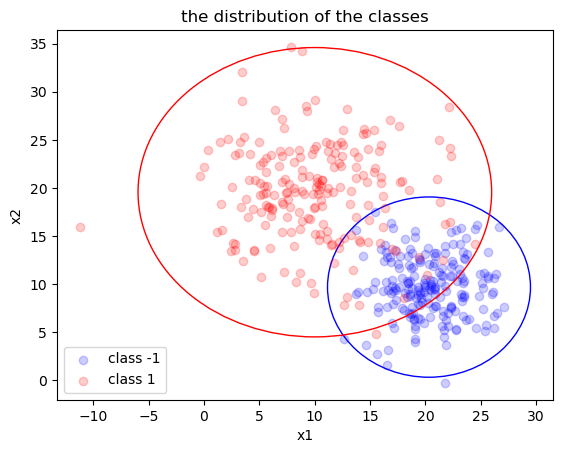

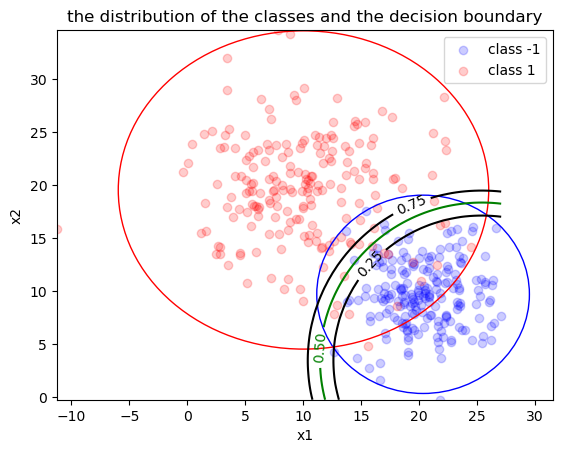

In [276]:

# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclass.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus,sigmas,classes_pdf=distribution_calculation(groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plot(mus,sigmas,data)

In [277]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [278]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[28.34933274, -0.        ],
        [-0.        , 25.12985627]])}

In [256]:
"report for binclass one
# since the variance of the positive class is much higher than that of the negative class
# the decision boundary is in the corner near to the small area where the negative class found.


SyntaxError: EOL while scanning string literal (513831434.py, line 1)

In [257]:
# working on binclass.txt

we assume that the two classes have the same variance (the variance of all the data.

SyntaxError: invalid syntax (3128107544.py, line 3)

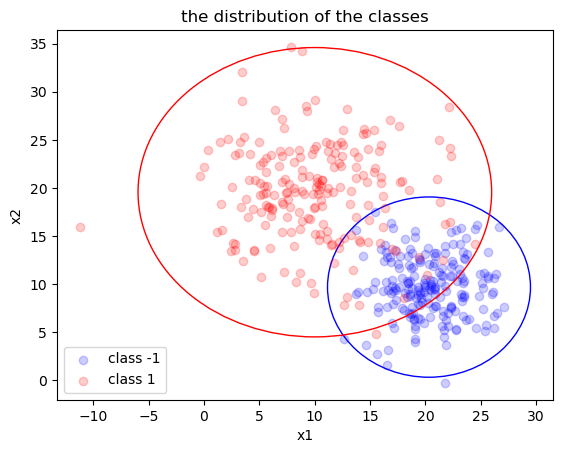

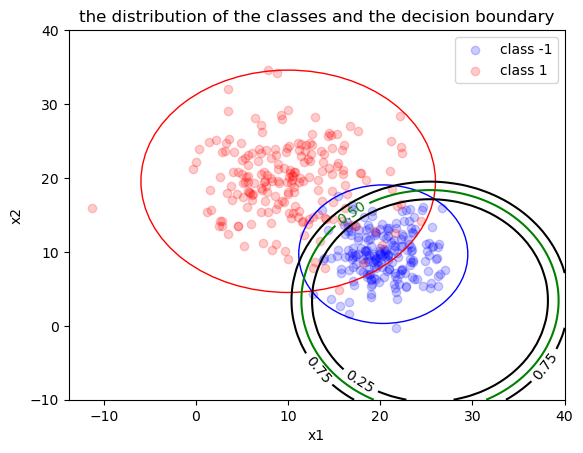

In [279]:
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclass.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus2,sigmas2,classes_pdf2=distribution_calculationV2(data,groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plotV2(mus2,sigmas2,data)

In [280]:
mus2

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [281]:
sigmas2

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[28.34933274, -0.        ],
        [-0.        , 25.12985627]])}

In [282]:
#"report 

both the classes have the same variance,
but different means therefore the decision boundary tends to divide the feature space equally between the two classes.


SyntaxError: invalid syntax (2901040032.py, line 3)

In [283]:
"working on binclassv2"

'working on binclassv2'

In [284]:


#each class has its own variance

#test one with each class has its own variance

In [285]:
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclassV2.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus,sigmas,classes_pdf=distribution_calculation(groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plot(mus,sigmas,data

SyntaxError: unexpected EOF while parsing (3977031798.py, line 7)

In [287]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [288]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[28.34933274, -0.        ],
        [-0.        , 25.12985627]])}

In [289]:
report
 
#the decision boundary takes the shape of ellipse inside the class of the high variance

NameError: name 'report' is not defined

In [290]:
#test two with  the two classes have the same variance which we will assume as the variance of the whole dataset

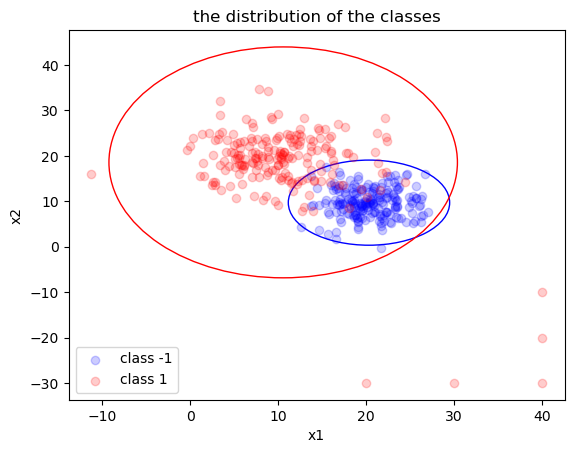

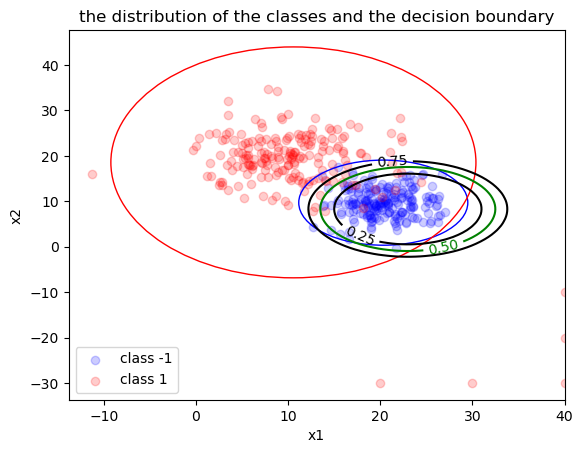

In [291]:
# read the file 
numberOfClasses,groups,numFeatures,data=read_file('binclassV2.txt',sep=',',names=['x1','x2','class'],classColumn='class')
colors=['blue','red']
# plot the distribution of all the two classes
mus2,sigmas2,classes_pdf2=distribution_calculationV2(data,groups=groups,colors=colors,classColumn='class',numFeatures=numFeatures)
# plot the decision boundary
boundary_plotV2(mus2,sigmas2,data)

In [292]:
prior=0.5
# evaluate the model
print('the accuracy ',evaluation(data,classes_pdf2,prior))

the accuracy  0.955


In [293]:
mus

{-1: array([20.32489   ,  9.68799575]), 1: array([10.01145763, 19.5495245 ])}

In [294]:
sigmas

{-1: array([[9.3405386 , 0.        ],
        [0.        , 9.75616121]]),
 1: array([[28.34933274, -0.        ],
        [-0.        , 25.12985627]])}

In [238]:
report
the decision boundary tends to be line,divides the feature space between the two classes

NameError: name 'report' is not defined